# Лабораторная работа #2
$\textbf{Стохастический градиентный спуск.}$

Рассмотрим задачу оптимизации

$\min \left\{(x - \mu_0)^\top A (x - \mu_0) : \|x\|_2^2 \leq 1 \right\}$,

где $x \in \mathbb{R}^n$, $A$ - симметричная, положительно определенная матрица, $\mu_0 = \left(1, 1, \ldots, 1\right)^\top \in \mathbb{R}^n$.

## Пункт 1. Двойственная задача

Запишем функцию Лагранжа, включающую в себя основное выражение и ограничение. Введем множитель Лагранжа $\lambda \geq 0$ для ограничения на норму:

$\mathcal{L}(x, \lambda) = (x - \mu_0)^{\top} A (x - \mu_0) + \lambda (\|x\|_2^2 - 1) \stackrel{\text{упр. из 1 лаб.}}{=} x^\top Ax - 2\mu_0^\top Ax + \mu_0^\top A\mu_0 + \lambda (\|x\|_2^2 - 1)$.

Двойственная задача формулируется как:

$\underset{\lambda \geq 0}{\max} \underset{x}{\min} \mathcal{L}(x, \lambda)$.

Можем упростить, найдя минимум по $x$. Для этого продифференцируем Лагранжиан по x, приравняем к 0 и выразим x:

$\frac{\partial \mathcal{L}}{\partial x} = 2A (x - \mu_0) + 2\lambda x = 0$

$A (x - \mu_0) = -\lambda x$

$Ax + \lambda I x =  A\mu_0$, где $I$ - единичная матрица той же размеерности, что и матрица $A$.

$(A + \lambda I) x = A\mu_0$

$x = (A + \lambda I)^{-1} A\mu_0$

Подставим найденный $x$ в двойственную задачу:

$\underset{\lambda \geq 0}{\max} \underset{x}{\min} \mathcal{L}(x, \lambda) = \underset{\lambda \geq 0}{\max} \mathcal{L}((A + \lambda I)^{-1} A\mu_0, \lambda) = \underset{\lambda \geq 0}{\max} \mathcal{G}(\lambda)$.

Теперь нужно найти градиент $\mathcal{G}(\lambda)$. Для этого понадобится производная обратной матрицы $\left[D_{X_0} X^{-1}\right](H) = -X_0^{-1}\cdot \left[D_{X_0} X\right](H) \cdot X_0^{-1}$ ([доказательство](https://education.yandex.ru/handbook/ml/article/matrichnoe-differencirovanie)).

Примем за $B(\lambda) = \left(A + \lambda I\right)$. Тогда $\frac{\partial}{\partial \lambda} \left[B(\lambda)^{-1}\right] = - B(\lambda)^{-1} \cdot \underbrace{\left(\frac{\partial B(\lambda)}{\partial \lambda}\right)}_{I}\cdot B(\lambda)^{-1} = - B(\lambda)^{-1} B(\lambda)^{-1}$.

Начнем с того, что дифференцируем $x = (A + \lambda I)^{-1} A\mu_0 = B(\lambda)^{-1} A\mu_0$. 

$\frac{\partial x}{\partial \lambda} = \frac{\partial}{\partial \lambda}\left[B(\lambda)^{-1} A\mu_0\right]$

Используя правило производной произведения, получим:

$\frac{\partial x}{\partial \lambda} = \frac{\partial}{\partial \lambda}\left[B(\lambda)^{-1}\right] A\mu_0 = - B(\lambda)^{-1} B(\lambda)^{-1} A\mu_0 = - B(\lambda)^{-2} A\mu_0$.

Теперь применим полученные производные к каждому слагаемому:

1. $\frac{\partial}{\partial \lambda} \left(x^\top Ax\right) = \left(\frac{\partial x}{\partial \lambda}\right)^\top A x + x^\top A \frac{\partial x}{\partial \lambda} = $

$\left(- B(\lambda)^{-2} A\mu_0 \right)^\top A \left(B(\lambda)^{-1} A\mu_0\right) + \left(B(\lambda)^{-1} A\mu_0\right)^\top A \left(- B(\lambda)^{-2} A\mu_0 \right) =$

Предполагаем, что $A B(\lambda)^{-1} A = A^2 B(\lambda)^{-1}$ из свойств симметричности $A$ и $B$.

$- \mu_0^\top A^\top B(\lambda)^{-2} A^2 B(\lambda)^{-1} \mu_0 - \mu_0^\top A^\top B(\lambda)^{-1} A^2 B(\lambda)^{-2} \mu_0 =$

$-2 \mu_0^\top A B(\lambda)^{-3} A^2 \mu_0$;

2. $\frac{\partial}{\partial \lambda} \left(- 2\mu_0^\top Ax\right) = -2\mu_0^\top A \left(- B(\lambda)^{-2} A\mu_0\right) = 2\mu_0^\top A B(\lambda)^{-2} A\mu_0$;

3. $\frac{\partial}{\partial \lambda} \left(\mu_0^\top A\mu_0\right) = 0$;

4. $\frac{\partial}{\partial \lambda} \left(\lambda \left(\|x\|_2^2 - 1\right)\right) = \left(\|x\|_2^2 - 1\right) + \lambda \frac{\partial}{\partial \lambda} \left(\|x\|_2^2\right)$, где $\|x\|_2^2 = x^\top x$, $\frac{\partial}{\partial \lambda} \left(\|x\|_2^2\right) = 2 x^\top \frac{\partial x}{\partial \lambda}$

   $= \left(x^\top x - 1\right) + 2 \lambda x^\top \frac{\partial x}{\partial \lambda} = \left((B(\lambda)^{-1} A \mu_0)^\top(B(\lambda)^{-1} A \mu_0) - 1 \right) + 2\lambda (B(\lambda)^{-1} A \mu_0)^\top \left(- B(\lambda)^{-2} A\mu_0\right) = $
   
   $- 2\lambda \mu_0^\top A B(\lambda)^{-3} A \mu_0 + \mu_0^\top A B(\lambda)^{-2} A \mu_0 - 1$.
   
Собираем градиент $\mathcal{G}(\lambda)$ из слагаемых:

$\nabla \mathcal{G}(\lambda) = -2 \mu_0^\top A B(\lambda)^{-3} A^2 \mu_0 + 2\mu_0^\top A B(\lambda)^{-2} A\mu_0 - 2\lambda \mu_0^\top A B(\lambda)^{-3} A \mu_0 + \mu_0^\top A B(\lambda)^{-2} A \mu_0 - 1 =$

$-2 \mu_0^\top A B(\lambda)^{-3} A^2 \mu_0 + 3\mu_0^\top A B(\lambda)^{-2} A\mu_0 - 2\lambda \mu_0^\top A B(\lambda)^{-3} A \mu_0 - 1$

In [22]:
import cvxpy as cp
import numpy as np

def objective_function(x, mu_0, A):
    """Objective function
       f(x) = (x - mu_0)^T A (x - mu_0)
    """
    return (x - mu_0).T @ A @ (x - mu_0)

def gradient_objective(x, mu_0, A):
    """Gradient
       f'(x) = 2 A (x - mu_0)
    """
    return 2 * A @ (x - mu_0)

def gradient_constraint(x):
    """Gradient
       g'(x) = 2 x
    """
    return 2 * x

def B(A, y):
    return A + y * np.eye(A.shape[0])

def G(A, mu_0, y):
    _B = B(A, y)
    inv_B = np.linalg.pinv(_B)
    _x = inv_B @ A @ mu_0
    return (_x - mu_0).T @ A @ (_x - mu_0) + y * (_x.T @ _x - 1)

def gradient_G(A, mu_0, y):
    _B = B(A, y)
    inv_B = np.linalg.inv(_B)
    inv_2_B = inv_B @ inv_B
    inv_3_B = inv_2_B @ inv_B
    A_mu = A @ mu_0
    return -2 * A_mu.T @ inv_3_B @ A @ A_mu + 3 * A_mu.T @ inv_2_B @ A_mu - 2 * y * A_mu.T @ inv_3_B @ A_mu - 1

def project_to_unit_ball(x):
    """Projects a vector onto the unit ball.
    """
    norm = np.linalg.norm(x, 2)
    if norm > 1:
        return x / norm
    return x

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

def solve_cvx_forward(A, mu_0, x_0=None):
    """Solves the convex optimization problem and returns 
       the optimal solution and its optimality.
    """
    assert np.allclose(A, A.T), "Matrix A must be symmetric"
    assert is_pos_def(A), "Matrix A must be positive semi-definite"
    assert A.shape[0] == mu_0.shape[0], "Matrix A and vector mu_0 must be the same size"
    
    x = cp.Variable(n)
    if x_0 is not None:
        x.value = x_0
        
    # Wrapping A as a positive semi-definite matrix
    A_wrapped = cp.psd_wrap(A)

    objective = cp.Minimize(cp.quad_form(x - mu_0, A_wrapped))
    constraints = [cp.sum_squares(x) <= 1]

    problem = cp.Problem(objective, constraints)
    problem.solve(solver=cp.SCS, eps=1e-9)

    x_star = x.value
    optimal_value = problem.value
    
    optimality = np.linalg.norm(project_to_unit_ball(gradient_objective(x_star, mu_0, A)) + 
                                project_to_unit_ball(gradient_constraint(x_star))) < 1e-4 and \
    np.linalg.norm(x_star.astype(np.float32), 2) <= 1
        
    return x_star, optimal_value, optimality


In [23]:
def backtracking_line_search(y, delta_y, alpha: float = 0.1, beta: float = 0.3, t: float = 1) -> float:
    """Backtracking Line Search
    """
    it = 1
    while G(A, mu_0, y + t * delta_y) > G(A, mu_0, y) + alpha * t * gradient_G(A, mu_0, y).T * delta_y:
        t *= beta
        it += 1
    return t, it

def projected_gradient_descent(A, mu_0, y_0, y_star, epsilon=0.01, max_iterations=150, exit_max_iter=False):
    """Gradient descent
    """
    assert np.allclose(A, A.T), "Matrix A must be symmetric"
    assert is_pos_def(A), "Matrix A must be positive semi-definite"
    assert A.shape[0] == mu_0.shape[0], "Matrix A and vector mu_0 must be the same size"
    
    y = y_0
    convergence = []
    bls_iterations = []
    
    for iteration in range(max_iterations):
        grad = gradient_G(A, mu_0, y)
        delta_y = -grad
        
        t = 1
        if A.shape[0] >= 80:
            t = 500
        if A.shape[0] >= 60:
            t = 300
        if A.shape[0] >= 60:
            t = 200
        elif A.shape[0] >= 20:
            t = 100
        elif A.shape[0] >= 10:
            t = 20
            
        _y, it = backtracking_line_search(y, delta_y, t=t)
        bls_iterations.append(it)
        
        y_new = y + _y * grad
        if y_new < 0:
            y_new = 0
        
        norm = np.linalg.norm(y_star - y_new)
        convergence.append(norm)
        if not exit_max_iter and norm < epsilon:
            return y_new, iteration, convergence, bls_iterations
        
        y = y_new
    
    return y, iteration, convergence, bls_iterations

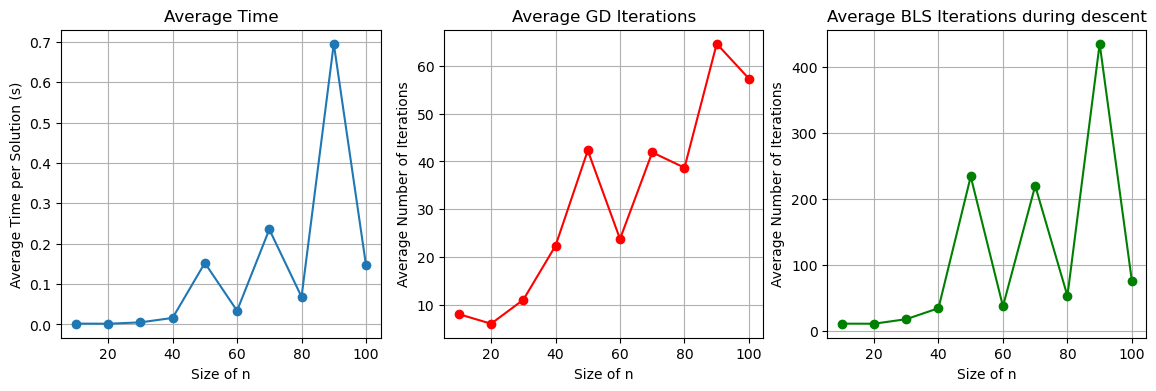

In [24]:
import random
from time import perf_counter

import matplotlib.pyplot as plt

np.random.seed(35)
random.seed(35)

NREPETITION = 10

sizes = []
times = []
iterations = []
bls_iterations = []
for n in range(10, 101, 10):
    A = np.random.randn(n, n)
    A = A.T @ A
    mu_0 = np.ones(n)
    
    t = 0
    iters = 0
    bls_iters = 0
    for _ in range(NREPETITION):
        x_0 = project_to_unit_ball(np.random.randn(n))
        x_star, _, optimality = solve_cvx_forward(A, mu_0, x_0)
        assert optimality, "The solution must be optimal"
        y_star = (A @ mu_0 - A @ x_star).T @ x_star / (x_star.T @ x_star)
        y_0 = random.random()
        t -= perf_counter()
        _Y, it, _, bls_it = projected_gradient_descent(A, mu_0, y_0, y_star, epsilon=1e-6)
        t += perf_counter()
        iters += it
        bls_iters += sum(bls_it)
    
    sizes.append(n)
    times.append(t / NREPETITION)
    iterations.append(iters / NREPETITION)
    bls_iterations.append(bls_iters / NREPETITION)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

ax1.plot(sizes, times, marker='o')
ax1.set_xlabel('Size of n')
ax1.set_ylabel('Average Time per Solution (s)')
ax1.set_title('Average Time')
ax1.grid(True)

ax2.plot(sizes, iterations, marker='o', color='r')
ax2.set_xlabel('Size of n')
ax2.set_ylabel('Average Number of Iterations')
ax2.set_title('Average GD Iterations')
ax2.grid(True)

ax3.plot(sizes, bls_iterations, marker='o', color='g')
ax3.set_xlabel('Size of n')
ax3.set_ylabel('Average Number of Iterations')
ax3.set_title('Average BLS Iterations during descent')
ax3.grid(True)

plt.show()

Градиентный спуск сошелся до точности $\epsilon = 1e-6$; можно и точнее, но для этого приходится точнее выбирать начальные параметры шага, а так же $\alpha$ и $\beta$. Видим, что при увелечении $n$ время решения, а также среднее количество итераций метода растет.

# Пункт 2. Применение стохастического градиентного спуска

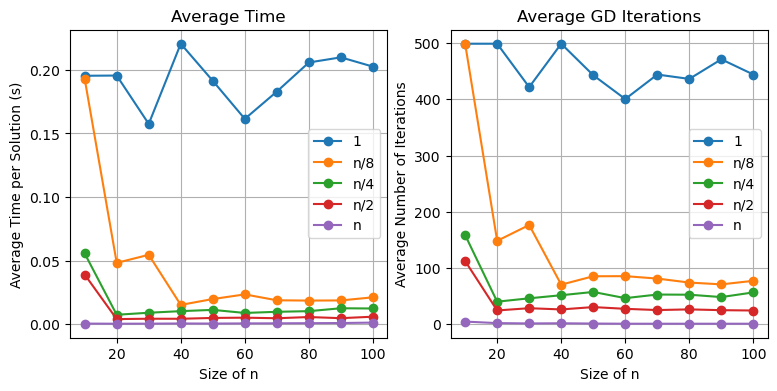

In [160]:
import numpy as np
from time import perf_counter

def objective_function(x, mu_0, A):
    """Objective function: (x - mu_0).T @ A @ (x - mu_0)"""
    return (x - mu_0).T @ A @ (x - mu_0)

def gradient_objective(x, mu_0, A):
    """Gradient of the objective function"""
    return 2 * A @ (x - mu_0)

def is_pos_def(A):
    """Check if a matrix is positive definite"""
    return np.all(np.linalg.eigvals(A) > 0)

def project_to_unit_ball(x):
    """Project x to the unit ball"""
    norm_x = np.linalg.norm(x)
    return x / norm_x if norm_x > 1 else x

def reset(eta, eta_max, gamma, b, k, opt):
    """Reset step-size heuristic"""
    if k == 0:
        return eta_max
    elif opt == 0:
        return eta
    elif opt == 1:
        return eta_max
    elif opt == 2:
        return eta * gamma ** (b / n)
    return eta

def sgd_armijo(A, mu_0, x_0, x_star, m, eta_max, b, c, beta, gamma, opt, epsilon=0.01, max_iterations=100, exit_max_iter=False):
    """Stochastic Gradient Descent with Armijo Line Search"""
    assert np.allclose(A, A.T), "Matrix A must be symmetric"
    assert is_pos_def(A), "Matrix A must be positive semi-definite"
    assert A.shape[0] == mu_0.shape[0], "Matrix A and vector mu_0 must be the same size"
    
    n = A.shape[0]
    x = x_0
    convergence = []
    eta = eta_max
    
    for iteration in range(max_iterations):
        I_k = np.random.choice(n, m, replace=False)  # Random mini-batch
        grad = 2 * np.sum([A[:, i] * (x[i] - mu_0[i]) for i in I_k], axis=0) / m
        
        eta = reset(eta, eta_max, gamma, b, iteration, opt) / beta
        
        while True:
            eta *= beta
            x_new = x - eta * grad
            x_new = project_to_unit_ball(x_new)
            if objective_function(x_new, mu_0, A) <= objective_function(x, mu_0, A) - c * eta * np.linalg.norm(grad)**2:
                break
        
        x = project_to_unit_ball(x_new)
        obj = objective_function(x, mu_0, A)
        norm = np.linalg.norm(x_star - obj)
        # print(m, norm, eta)
        convergence.append(norm)
        
        if not exit_max_iter and np.linalg.norm((x_star - obj) / x_star) < epsilon:
            return x, iteration + 1, convergence
        
    return x, iteration, convergence

# Пример параметров
np.random.seed(36)

NREPETITION = 10

sizes = []
times = {}
iterations = {}
for n in range(10, 101, 10):
    mu_0 = np.ones(n)
    for m, m_name in zip([1, n//8, n//4, n//2, n], ['1', 'n/8', 'n/4', 'n/2', 'n']):
        t = 0
        iters = 0
        for _ in range(NREPETITION):
            A = np.random.randn(n, n)
            A = A.T @ A
            x_0 = project_to_unit_ball(np.random.randn(n))
            x_star, x_value, optimality = solve_cvx_forward(A, mu_0, x_0)
            assert optimality, "The solution must be optimal"
            
            # Начало измерения времени
            start_time = perf_counter()
            _, it, _ = sgd_armijo(A, mu_0, x_0, x_value, m, eta_max=1, b=10, c=0.1, beta=0.5, gamma=0.5, opt=1, epsilon=1e-2, max_iterations=500)
            # Конец измерения времени
            end_time = perf_counter()
            
            t += (end_time - start_time)
            iters += it

        if m_name not in times:
            times[m_name] = [t / NREPETITION]
            iterations[m_name] = [iters / NREPETITION]
        else:
            times[m_name].append(t / NREPETITION)
            iterations[m_name].append(iters / NREPETITION)
    sizes.append(n)

# print("Sizes:", sizes)
# print("Times:", times)
# print("Iterations:", iterations)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

for m_name in times:
    ax1.plot(sizes, times[m_name], marker='o', label=m_name)
ax1.set_xlabel('Size of n')
ax1.set_ylabel('Average Time per Solution (s)')
ax1.set_title('Average Time')
ax1.grid(True)
ax1.legend()

for m_name in iterations:
    ax2.plot(sizes, iterations[m_name], marker='o', label=m_name),
ax2.set_xlabel('Size of n')
ax2.set_ylabel('Average Number of Iterations')
ax2.set_title('Average GD Iterations')
ax2.grid(True)
ax2.legend()

plt.show()

# Пункт 3. Результаты работы метода